In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
# set up the perimeter
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365 * 5)

# list of tickers
tickers = ['C','AAPL','TSLA','NVDA','SPY']

In [4]:
# Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

#  Calculate the daily log returns 
returns = np.log(adj_close_df/adj_close_df.shift(1))
# drop NaN
returns  = returns.dropna()
returns

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,C,AAPL,TSLA,NVDA,SPY
Date,,,,,
2020-02-06,0.001520,0.011629,0.019223,0.013822,0.003359
2020-02-07,-0.003552,-0.013686,-0.001189,-0.010518,-0.005344
2020-02-10,-0.002672,0.004738,0.030555,0.044239,0.007437
2020-02-11,0.007743,-0.006051,0.004011,0.018536,0.001732
2020-02-12,0.003030,0.023470,-0.009198,0.017209,0.006422
...,...,...,...,...,...
2025-01-27,-0.005045,0.031286,-0.023467,-0.185946,-0.014246
2025-01-28,-0.014037,0.035892,0.002364,0.085497,0.008556
2025-01-29,0.008594,0.004606,-0.022842,-0.041876,-0.004493


In [7]:
### a 10,000,000 $ portfolio and set up random weights
portfolio_value = 10000000 # 10M
weights = np.array([np.random.rand() for i in range(5)])

# compute the portfolio expected returns as a simple historic average (to make it simple)
def expected_returns(returns, weights):
    return np.sum(returns.mean()*weights)

portfolio_expected_return = expected_returns(returns, weights)


# compute the portfolio risk as a function of the tickers' variance and correlation (covariance)
def standard_deviation(returns, weights):
    cov = returns.cov()
    return np.sqrt( weights.T @ cov @ weights )

portfolio_std_dev = standard_deviation(returns, weights)

In [9]:
days = 30
def Expected_Gains_Losses(PortfolioValue, portfolio_expected_return, portfolio_std_dev, days):
    Wiener_random_term = np.random.normal(0, 1)
    return PortfolioValue * portfolio_expected_return * days + PortfolioValue * portfolio_std_dev * Wiener_random_term * np.sqrt(days)

In [10]:
# Run 10000 simulations
potentialReturns = []

for i in range(10000):
    potentialReturns.append(Expected_Gains_Losses(portfolio_value, portfolio_expected_return, portfolio_std_dev, days))

In [12]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.98
VaR = -np.percentile(potentialReturns, 100 * (1 - confidence_interval))
print(VaR)

5287937.50180992


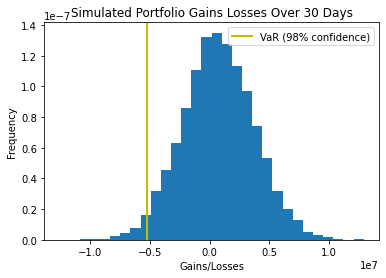

In [20]:
# Plot the 10000 simulations
plt.hist(potentialReturns, bins = 30, density=True)
plt.xlabel('Gains/Losses')
plt.ylabel('Frequency')
plt.title(f'Simulated Portfolio Gains Losses Over {days} Days')
plt.axvline(-VaR, color='y', linewidth=2, label=f'VaR (98% confidence)')
plt.legend()
plt.show()